# Models v4 Onward

Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

%matplotlib inline

Reading csvs

In [8]:
sub_df = pd.read_csv('data/submission_format.csv')
test_vals = pd.read_csv('data/test_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')
train_vals = pd.read_csv('data/training_set_values.csv')
train_df = pd.read_csv('data/clean_train.csv')

### Viewing head, info, and some value_counts

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55973 entries, 0 to 55972
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55973 non-null  int64  
 1   id                 55973 non-null  int64  
 2   amount_tsh         55973 non-null  float64
 3   date_recorded      55973 non-null  object 
 4   gps_height         55973 non-null  int64  
 5   longitude          55973 non-null  float64
 6   latitude           55973 non-null  float64
 7   wpt_name           55973 non-null  object 
 8   basin              55973 non-null  object 
 9   subvillage         55973 non-null  object 
 10  region             55973 non-null  object 
 11  region_code        55973 non-null  int64  
 12  district_code      55973 non-null  int64  
 13  lga                55973 non-null  object 
 14  ward               55973 non-null  object 
 15  population         55973 non-null  int64  
 16  permit             559

## Decision Tree with Dummy Attributes | 75.1%
'construction_year', 'waterpoint_type', 'quantity', 'water_quality', 'extraction_type', 'management', 'permit', 'basin', 'status_group'

In [10]:
dt_mini_df = train_df[['construction_year', 'waterpoint_type', 'quantity', 'water_quality',
                             'extraction_type', 'management', 'permit', 'basin', 'status_group']]

dt_mini_df = pd.get_dummies(dt_mini_df, columns=['waterpoint_type', 'water_quality', 'extraction_type', 'quantity',
                                                'management', 'permit', 'basin']).drop('extraction_type_other - mkulima/shinyanga', axis=1)
# print(dt_mini_df.columns)

X = dt_mini_df.drop('status_group', axis=1)
y = dt_mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 76.0 %


### Confusion Matrix

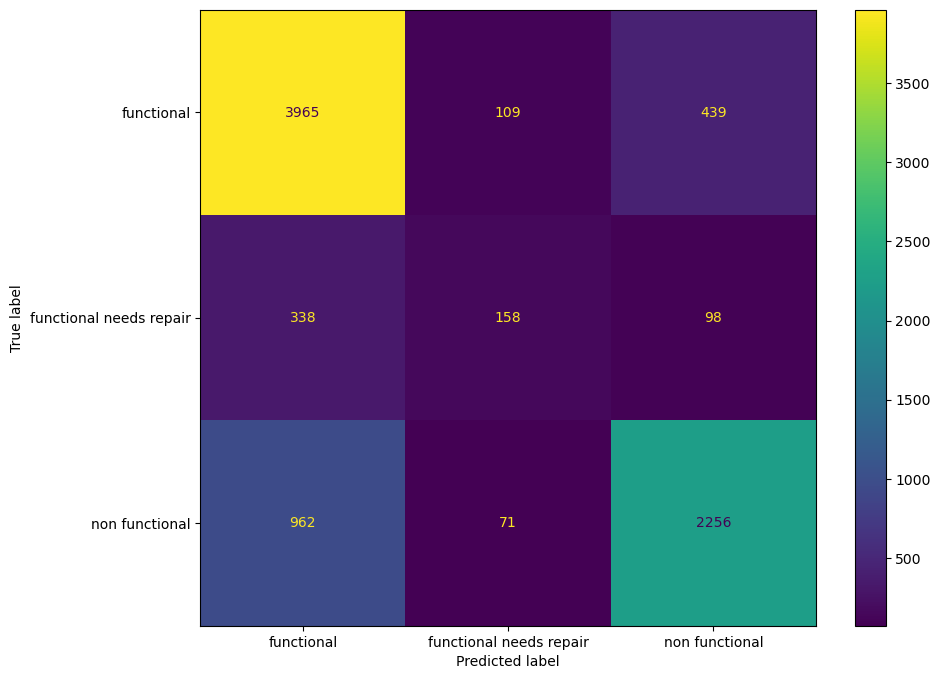

In [11]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=dt.classes_), display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

# MAKING A SUBMISSION

Predicting on the test data and creating the csv file

In [12]:
test_vals_submit = pd.get_dummies(test_vals, columns=['waterpoint_type', 'water_quality', 'extraction_type', 
                                                      'quantity', 'management', 'permit', 'basin'])

y_pred_submit = dt.predict(test_vals_submit[['construction_year', 'waterpoint_type_cattle trough',
                                           'waterpoint_type_communal standpipe',
                                           'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
                                           'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
                                           'waterpoint_type_other', 'water_quality_coloured',
                                           'water_quality_fluoride', 'water_quality_fluoride abandoned',
                                           'water_quality_milky', 'water_quality_salty',
                                           'water_quality_salty abandoned', 'water_quality_soft',
                                           'water_quality_unknown', 'extraction_type_afridev',
                                           'extraction_type_cemo', 'extraction_type_climax',
                                           'extraction_type_gravity', 'extraction_type_india mark ii',
                                           'extraction_type_india mark iii', 'extraction_type_ksb',
                                           'extraction_type_mono', 'extraction_type_nira/tanira',
                                           'extraction_type_other', 'extraction_type_other - play pump',
                                           'extraction_type_other - rope pump', 'extraction_type_other - swn 81',
                                           'extraction_type_submersible', 'extraction_type_swn 80',
                                           'extraction_type_walimi', 'extraction_type_windmill', 'quantity_dry',
                                           'quantity_enough', 'quantity_insufficient', 'quantity_seasonal',
                                           'quantity_unknown', 'management_company', 'management_other',
                                           'management_other - school', 'management_parastatal',
                                           'management_private operator', 'management_trust', 'management_unknown',
                                           'management_vwc', 'management_water authority',
                                           'management_water board', 'management_wua', 'management_wug',
                                           'permit_False', 'permit_True', 'basin_Internal', 'basin_Lake Nyasa',
                                           'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria',
                                           'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast',
                                           'basin_Wami / Ruvu']])

In [13]:
submission1_df = pd.concat([test_vals['id'].reset_index(drop=True), 
                            pd.Series(y_pred_submit).reset_index(drop=True)], 
                           axis=1).rename(columns={0:'status_group'})
submission1_df.rename(columns={0:'status_group'})

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


### Creating submission csv files

In [ ]:
sub_name = ''
# submission1_df.to_csv('submissions/submission' + sub_name + '.csv', index=False)  